<a href="https://colab.research.google.com/github/bani-ebegbodi/NLP_AI4ALL_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [1]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [6]:
import os
!kaggle datasets download -d evilspirit05/tweet-gpt
# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

Dataset URL: https://www.kaggle.com/datasets/evilspirit05/tweet-gpt
License(s): MIT
tweet-gpt.zip: Skipping, found more recently modified local copy (use --force to force download)


['.config', 'tweet-gpt.zip', 'sample_data']

In [7]:
import zipfile
import os

# Define the path to the zip file (adjust path if necessary)
zip_file_path = 'tweet-gpt.zip'

# Define the extraction path
extraction_path = 'tweet_gpt_data'  # Name of the folder to extract files into

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

print(f"Files extracted to {extraction_path}")

Files extracted to tweet_gpt_data


In [69]:
csv_file_path = os.path.join('tweet_gpt_data', 'tweet_gpt.csv')

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file_path)

####Code for loading the original, clean, and modified datasets

In [62]:
df_original = pd.read_csv("tweet_gpt_data/tweet_gpt.csv") #before any changes

In [ ]:
df_clean = pd.read_csv("tweet_gpt_data/clean_data.csv") #after removing outliers and unnecessary columns

In [ ]:
df_new = pd.read_csv("tweet_gpt_data/final_data.csv") #after feature engineering

## Dataset Exploration

In [63]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37460 entries, 0 to 37459
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             37460 non-null  object 
 1   Tweet            37460 non-null  object 
 2   Url              37460 non-null  object 
 3   User             37460 non-null  object 
 4   UserCreated      37460 non-null  object 
 5   UserVerified     37460 non-null  bool   
 6   UserFollowers    37460 non-null  float64
 7   UserFriends      37460 non-null  float64
 8   Retweets         37460 non-null  float64
 9   Likes            37460 non-null  int64  
 10  Location         37460 non-null  object 
 11  Description      37460 non-null  object 
 12  New_Date         37460 non-null  object 
 13  Time             37460 non-null  object 
 14  Hour             37460 non-null  int64  
 15  Day              37460 non-null  object 
 16  TweetStr         37460 non-null  object 
 17  hashtags    

In [14]:
df_original.isna().sum()
#no NULL values

,0
Date,0
Tweet,0
Url,0
User,0
UserCreated,0
UserVerified,0
UserFollowers,0
UserFriends,0
Retweets,0
Likes,0


In [26]:
df_original.describe()

,UserFollowers,UserFriends,Retweets,Likes,Hour,sentiment_score
count,3.746000e+04,3.746000e+04,37460.000000,37460.000000,37460.000000,37460.000000
mean,2.387098e+04,2.988389e+03,1.249653,4.758916,12.631260,0.759533
std,3.121077e+05,1.690600e+04,16.813713,47.643162,6.268079,0.145304
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.338051
25%,1.227500e+02,1.370000e+02,0.000000,0.000000,8.000000,0.640305
50%,6.470000e+02,5.180000e+02,0.000000,1.000000,13.000000,0.780510
75%,3.056000e+03,1.713000e+03,1.000000,2.000000,18.000000,0.884645
max,1.307921e+07,1.168327e+06,1623.000000,3770.000000,23.000000,0.992396


In [27]:
#numeric features
df_with_numeric_features = df_original.select_dtypes(exclude=['object', 'datetime64[ns]'])
df_with_numeric_features.columns
#UserVerified is True/False

Index(['UserVerified', 'UserFollowers', 'UserFriends', 'Retweets', 'Likes',
       'Hour', 'sentiment_score'],
      dtype='object')

In [28]:
#non-numeric features (text in our case)
df_with_non_numeric_features = df_original.select_dtypes(include=['object'])

In [29]:
df_with_non_numeric_features.columns
#what's the difference between data and new date?
#tweet and tweet string is the same thing
#clean_tweet is tweet all lower-case without hastags

Index(['Date', 'Tweet', 'Url', 'User', 'UserCreated', 'Location',
       'Description', 'New_Date', 'Time', 'Day', 'TweetStr', 'hashtags',
       'clean_tweet', 'sentiment_label', 'sentiment'],
      dtype='object')

## Data Cleaning

In [71]:
import pandas as pd
import numpy as np
import os
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
%matplotlib inline

### Filter outliers

In [72]:
features_considered = ['Retweets', 'Likes',	'sentiment_score', 'UserFollowers', 'UserFriends']
# calculate z-scores for numeric features
z_scores = zscore(df_original[features_considered], nan_policy='omit')
z_scores.head()

,Retweets,Likes,sentiment_score,UserFollowers,UserFriends
0,-0.074324,-0.099888,1.089088,-0.075485,-0.159436
1,-0.074324,-0.057909,-1.678030,-0.074812,-0.136308
2,-0.074324,-0.099888,1.134721,0.213138,-0.173455
3,-0.074324,-0.099888,-0.848548,-0.075401,-0.173632
4,-0.074324,-0.057909,1.081609,-0.076481,-0.176649


In [73]:
# convert to absolute values
abs_z_scores = np.abs(z_scores)
# filter based on |z-score| less than 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

df.loc[filtered_entries == False]
df_clean = df_original[filtered_entries]
print('Number of rows before filtering outliers', len(df_original))
print('Number of rows after filtering outliers', len(df_clean))

Number of rows before filtering outliers 37460
Number of rows after filtering outliers 36866


###Drop rows with missing clean tweet values

In [88]:
df_original.isna().sum()[df_original.isna().sum()>0]

,0
clean_tweet,1


In [89]:
df_clean = df_clean.dropna(subset = ['clean_tweet']).reset_index(drop = True)
df_clean.isna().sum()[df_clean.isna().sum()>0]

,0


###Drop unnecessary columns

In [90]:
#drop sentiment_label because it only has 1 unique value
df_original['sentiment_label'].nunique()

1

In [77]:
features_to_be_dropped = ['sentiment_label', 'Url', 'User', 'UserCreated', 'UserVerified', 'TweetStr', 'Time', 'Hour', 'Day', 'Date', 'New_Date', 'Tweet', 'hashtags', 'Description', 'Location']
df_clean = df_clean.drop(columns = features_to_be_dropped)

In [78]:
df_clean.to_csv("tweet_gpt_data/clean_data.csv", index = False)

In [79]:
df = df_clean.copy(deep = True)

In [91]:
df_clean.head(3)

,UserFollowers,UserFriends,Retweets,Likes,clean_tweet,sentiment_score,sentiment
0,312.0,293.0,0.0,0,openai’s gpt4 just got supercharged!,0.917779,positive
1,522.0,684.0,0.0,2,"classical art"" is struggling not changed the ...",0.515711,neutral
2,90392.0,56.0,0.0,0,alibaba invites businesses to trial chatgpt ri...,0.924410,neutral


## Feature Engineering

###Encode Sentiment Values

In [105]:
df_new = df_clean.copy(deep = True)

In [107]:
encode_categorical_values = {"neutral":0, "positive":1, "negative":2}
df_new['sentiment_code'] = df_new['sentiment'].apply(lambda x: encode_categorical_values[x])

In [108]:
encode_categorical_values = {"neutral":0, "positive":1, "negative":1}
df_new['sentiment_tone'] = df_new['sentiment'].apply(lambda x: encode_categorical_values[x])

In [109]:
df_new.head(3)

,UserFollowers,UserFriends,Retweets,Likes,sentiment_score,sentiment_code,sentiment_tone
count,36865.000000,36865.000000,36865.000000,36865.000000,36865.000000,36865.000000,36865.000000
mean,7931.234640,1822.532890,0.709860,2.795144,0.759418,0.662715,0.488268
std,39180.282978,4549.798989,2.603545,8.609195,0.145450,0.756594,0.499869
min,0.000000,0.000000,0.000000,0.000000,0.338051,0.000000,0.000000
25%,118.000000,134.000000,0.000000,0.000000,0.639948,0.000000,0.000000
50%,617.000000,511.000000,0.000000,1.000000,0.780447,0.000000,0.000000
75%,2947.000000,1667.000000,0.000000,2.000000,0.884741,1.000000,1.000000
max,956950.000000,53575.000000,51.000000,146.000000,0.992396,2.000000,1.000000


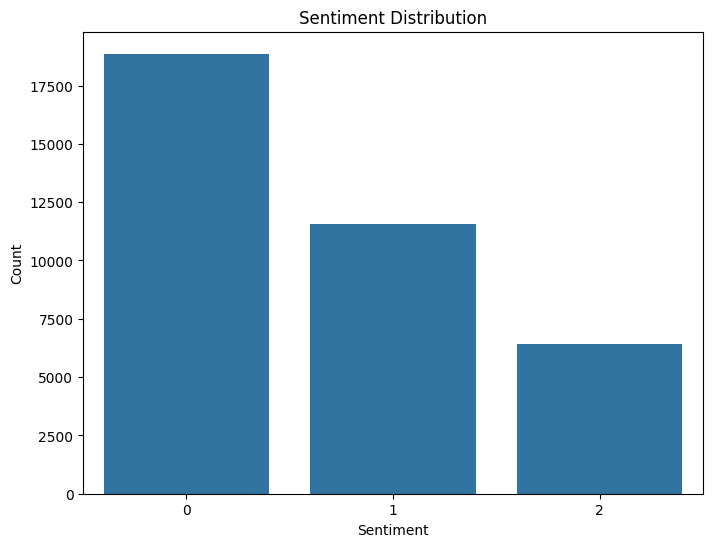

In [224]:
# @title Sentiment distribution
sentiment_counts = df_new['sentiment_code'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

plt.show()

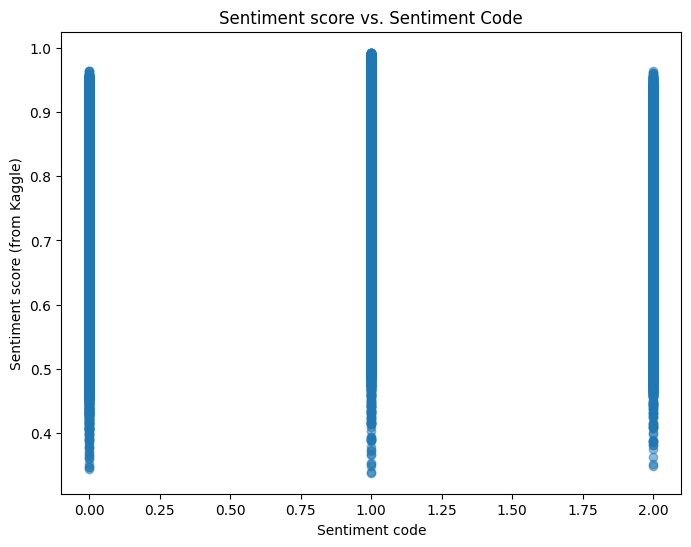

In [116]:
# @title Sentiment score vs. Sentiment code

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_new['sentiment_code'], df_new['sentiment_score'], alpha=0.5)
plt.title('Sentiment score vs. Sentiment Code')
plt.xlabel('Sentiment code')
_ = plt.ylabel('Sentiment score (from Kaggle)')

###Normalization of Engagment and UserFollowers

Engagement will be measured through the combination of likes and retweets.

In [110]:
df_new['engagement'] = df_new['Likes'] + df_new['Retweets']
df_new.head(3)

,UserFollowers,UserFriends,Retweets,Likes,clean_tweet,sentiment_score,sentiment,sentiment_code,sentiment_tone,engagement
0,312.0,293.0,0.0,0,openai’s gpt4 just got supercharged!,0.917779,positive,1,1,0.0
1,522.0,684.0,0.0,2,"classical art"" is struggling not changed the ...",0.515711,neutral,0,0,2.0
2,90392.0,56.0,0.0,0,alibaba invites businesses to trial chatgpt ri...,0.924410,neutral,0,0,0.0


In order to avoid misleading data between accounts with larger or smaller followings and a potential difference of engagement opportunitites, we use normalization to create a relative measure of normalization.

Engagement_per_follwer is the raw data of the average number of engagement, while Engagement_rate is the percent rate.

In [111]:
df_new['engagement_per_follower'] = np.where(
    df_new['UserFollowers'] == 0,
    0,
    df_new['engagement'] / df['UserFollowers']
)
df_new['engagement_rate'] = df_new['engagement_per_follower'] * 100
df_new.head(5)

,UserFollowers,UserFriends,Retweets,Likes,clean_tweet,sentiment_score,sentiment,sentiment_code,sentiment_tone,engagement,engagement_per_follower,engagement_rate
0,312.0,293.0,0.0,0,openai’s gpt4 just got supercharged!,0.917779,positive,1,1,0.0,0.000000,0.000000
1,522.0,684.0,0.0,2,"classical art"" is struggling not changed the ...",0.515711,neutral,0,0,2.0,0.003831,0.383142
2,90392.0,56.0,0.0,0,alibaba invites businesses to trial chatgpt ri...,0.924410,neutral,0,0,0.0,0.000000,0.000000
3,338.0,53.0,0.0,0,trying to stop students from using and is like...,0.636237,negative,2,1,0.0,0.000000,0.000000
4,1.0,2.0,0.0,2,i asked chatgpts ai chatbot how can i earn cry...,0.916693,neutral,0,0,2.0,2.000000,200.000000


In [112]:
df_new.isna().sum()[df_new.isna().sum()>0]

,0


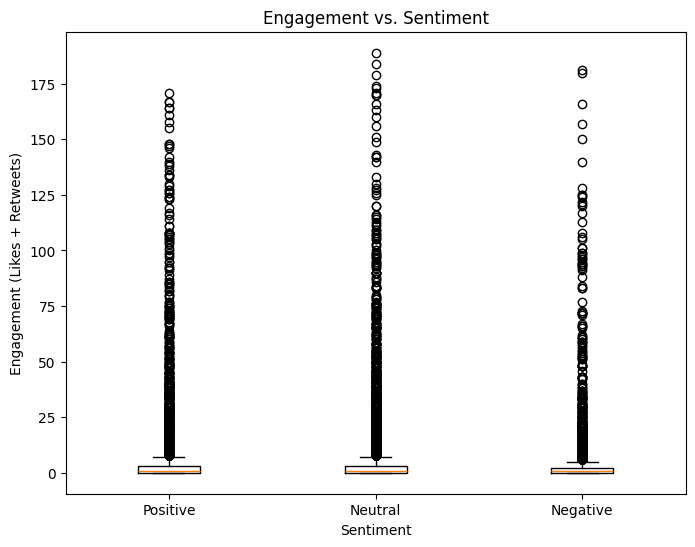

In [113]:
# @title Engagement vs. Sentiment

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_clean'

plt.figure(figsize=(8, 6))
plt.boxplot([df_new[df_new['sentiment'] == 'positive']['engagement'],
             df_new[df_new['sentiment'] == 'neutral']['engagement'],
             df_new[df_new['sentiment'] == 'negative']['engagement']],
            labels=['Positive', 'Neutral', 'Negative'])
plt.title('Engagement vs. Sentiment')
plt.ylabel('Engagement (Likes + Retweets)')
_ = plt.xlabel('Sentiment')

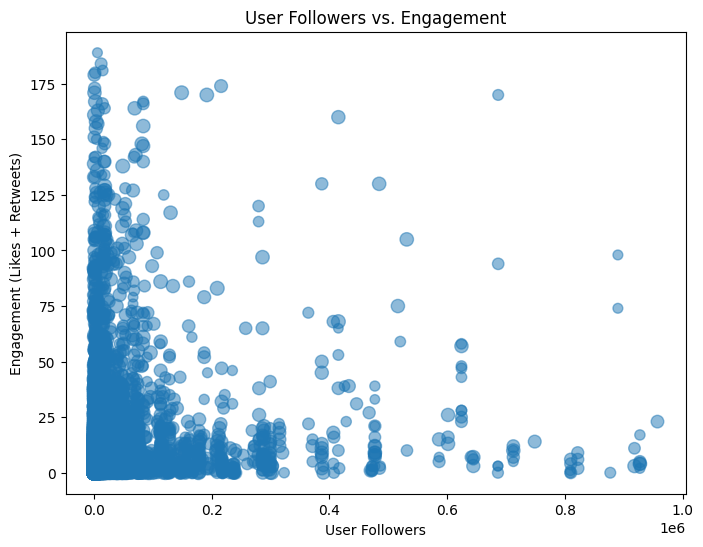

In [114]:
# @title User Followers vs. Engagement

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_new['UserFollowers'], df_new['engagement'], s=df_new['sentiment_score']*100, alpha=0.5)
plt.title('User Followers vs. Engagement')
plt.xlabel('User Followers')
_ = plt.ylabel('Engagement (Likes + Retweets)')

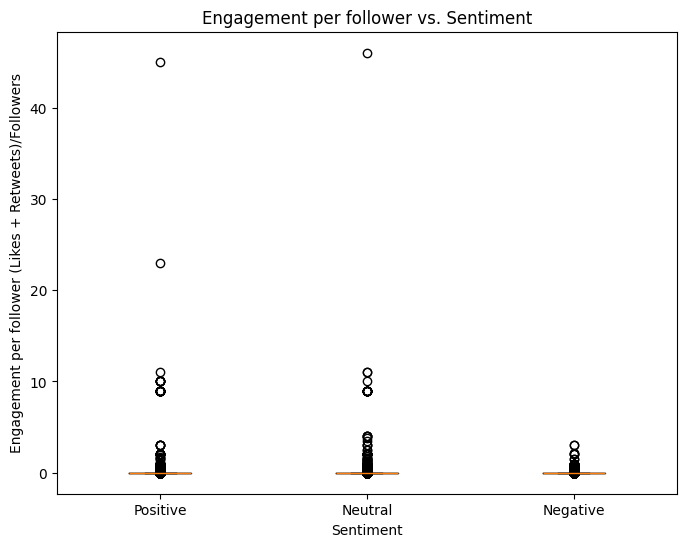

In [117]:
# @title Engagement per follower vs. Sentiment

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_clean'

plt.figure(figsize=(8, 6))
plt.boxplot([df_new[df_new['sentiment'] == 'positive']['engagement_per_follower'],
             df_new[df_new['sentiment'] == 'neutral']['engagement_per_follower'],
             df_new[df_new['sentiment'] == 'negative']['engagement_per_follower']],
            labels=['Positive', 'Neutral', 'Negative'])
plt.title('Engagement per follower vs. Sentiment')
plt.ylabel('Engagement per follower (Likes + Retweets)/Followers')
_ = plt.xlabel('Sentiment')

In [124]:
# @title Mutual Info Regression based on sentiment code and tone

numeric_features_1 = df_new.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist()
numeric_features_1.remove('sentiment_code')
numeric_features_np_1 = np.array(numeric_features_1)
total_nans = df_new[numeric_features_np_1].isna().sum().sum()
print(f"Total number of NaN values replaced: {total_nans}")

numeric_features_2 = df_new.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist()
numeric_features_2.remove('sentiment_tone')
numeric_features_np_2 = np.array(numeric_features_2)

# calculating mutual scores
m_info_1 = mutual_info_regression(df_new[numeric_features_np_1], df_new['sentiment_code'], n_neighbors=5, random_state=42)
m_info_2 = mutual_info_regression(df_new[numeric_features_np_2], df_new['sentiment_tone'], n_neighbors=5, random_state=42)
# creating dataframe
m_info_df_1 = pd.DataFrame({'Feature': numeric_features_np_1, 'Score for sentiment code': m_info_1})
m_info_df_1 = m_info_df_1.sort_values(by='Score for sentiment code', ascending=False)
print(m_info_df_1)

m_info_df_2 = pd.DataFrame({'Feature': numeric_features_np_2, 'Score for sentiment tone': m_info_2})
m_info_df_2 = m_info_df_2.sort_values(by='Score for sentiment tone', ascending=False)
print(m_info_df_2)

Total number of NaN values replaced: 0
                   Feature  Score for sentiment code
5           sentiment_tone                  0.693447
4          sentiment_score                  0.150049
0            UserFollowers                  0.073464
1              UserFriends                  0.064453
7  engagement_per_follower                  0.026999
8          engagement_rate                  0.025677
2                 Retweets                  0.003269
3                    Likes                  0.003012
6               engagement                  0.000000
                   Feature  Score for sentiment tone
5           sentiment_code                  0.693335
4          sentiment_score                  0.092463
0            UserFollowers                  0.044673
1              UserFriends                  0.041071
7  engagement_per_follower                  0.015636
8          engagement_rate                  0.013595
3                    Likes                  0.001586
2      

<Axes: >

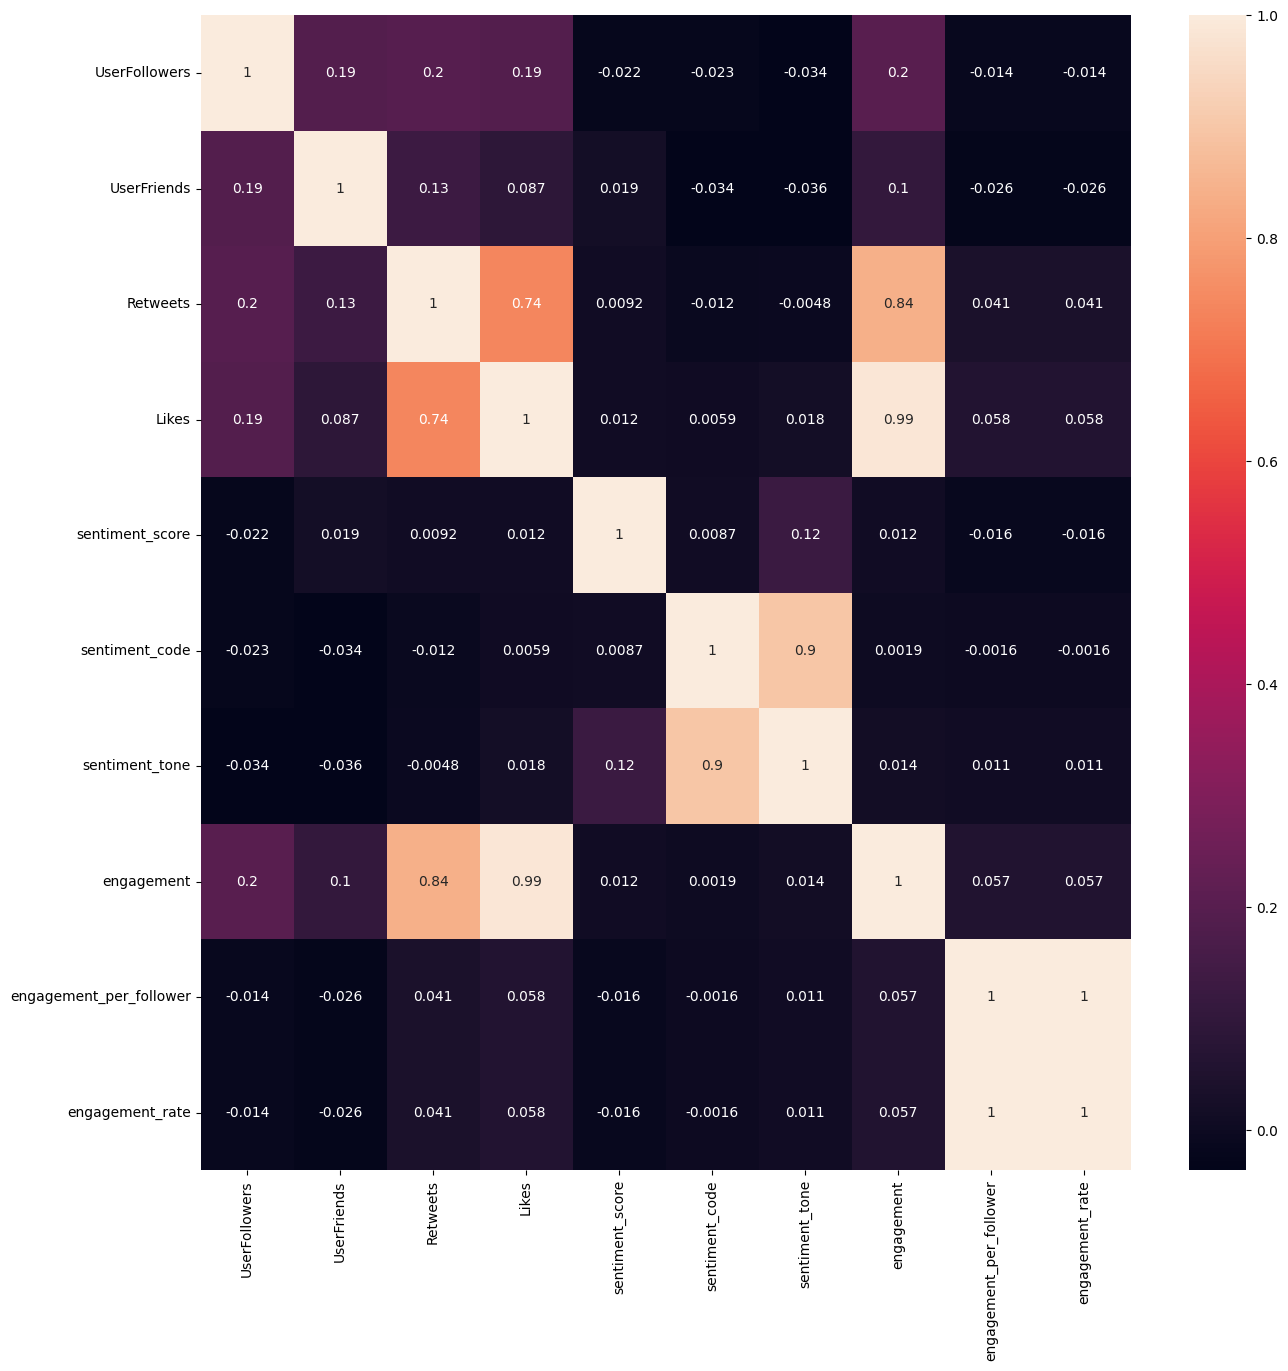

In [125]:
# @title Pearsons Coefficient
numeric_features = df_new.select_dtypes(exclude=['object', 'datetime64[ns]']).columns.tolist()
cor_matrix = df_new[numeric_features].corr()
plt.figure(figsize = (15,15))
sns.heatmap(cor_matrix, annot = True)

Likes and retweets have the highest correlation; other features do not seem correlated

Correlation between engagement/follower and sentiment score: -0.015815694683403707


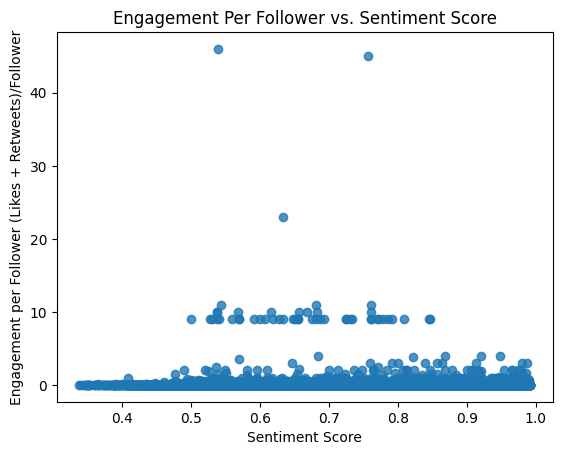

In [132]:
# @title Correlation of engagement per follower and sentiment score
correlation = df_new['engagement_per_follower'].corr(df_new['sentiment_score'])
print(f"Correlation between engagement/follower and sentiment score: {correlation}")

sns.regplot(x='sentiment_score', y='engagement_per_follower', data=df_new)
plt.title('Engagement Per Follower vs. Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Engagement per Follower (Likes + Retweets)/Follower')
plt.show()

Correlation between engagement/follower and sentiment code: -0.0016052581497873009


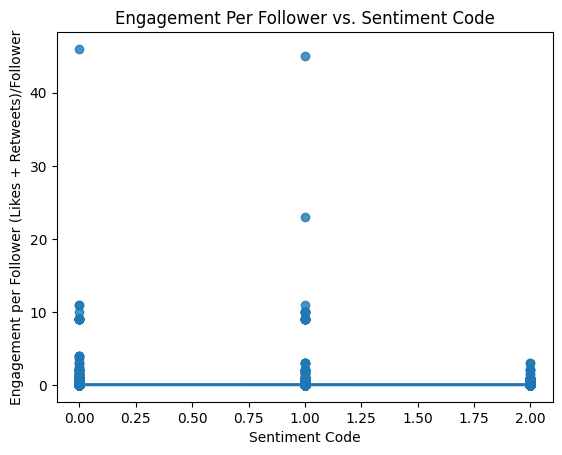

In [130]:
# @title Correlation of engagement per follower and sentiment code
correlation = df_new['engagement_per_follower'].corr(df_new['sentiment_code'])
print(f"Correlation between engagement/follower and sentiment code: {correlation}")

sns.regplot(x='sentiment_code', y='engagement_per_follower', data=df_new)
plt.title('Engagement Per Follower vs. Sentiment Code')
plt.xlabel('Sentiment Code')
plt.ylabel('Engagement per Follower (Likes + Retweets)/Follower')
plt.show()

In [133]:
df_new.to_csv("tweet_gpt_data/final_data.csv", index = False)

In [138]:
df_new.head(3)

,UserFollowers,UserFriends,Retweets,Likes,clean_tweet,sentiment_score,sentiment,sentiment_code,sentiment_tone,engagement,engagement_per_follower,engagement_rate
0,312.0,293.0,0.0,0,openai’s gpt4 just got supercharged!,0.917779,positive,1,1,0.0,0.000000,0.000000
1,522.0,684.0,0.0,2,"classical art"" is struggling not changed the ...",0.515711,neutral,0,0,2.0,0.003831,0.383142
2,90392.0,56.0,0.0,0,alibaba invites businesses to trial chatgpt ri...,0.924410,neutral,0,0,0.0,0.000000,0.000000


In [135]:
features_to_be_dropped = ['UserFollowers', 'UserFriends', 'Retweets', 'Likes', 'clean_tweet', 'sentiment', 'engagement', 'engagement_per_follower']
df_modified = df_new.drop(columns = features_to_be_dropped)

In [136]:
df_modified.describe()

,sentiment_score,sentiment_code,sentiment_tone,engagement_rate
count,36865.000000,36865.000000,36865.000000,36865.000000
mean,0.759418,0.662715,0.488268,3.460425
std,0.145450,0.756594,0.499869,50.119029
min,0.338051,0.000000,0.000000,0.000000
25%,0.639948,0.000000,0.000000,0.000000
50%,0.780447,0.000000,0.000000,0.032925
75%,0.884741,1.000000,1.000000,0.436681
max,0.992396,2.000000,1.000000,4600.000000


##Model development

###Filter outliers

In [175]:
features_considered = ['engagement_per_follower']
# calculate z-scores for numeric features
z_scores = zscore(df_new[features_considered], nan_policy='omit')
z_scores.head()

,engagement_per_follower
0,-0.069045
1,-0.061400
2,-0.069045
3,-0.069045
4,3.921509


In [176]:
# convert to absolute values
abs_z_scores = np.abs(z_scores)
# filter based on |z-score| less than 3
filtered_entries = (abs_z_scores < 3).all(axis=1)

df.loc[filtered_entries == False]
df_final = df_new[filtered_entries]
print('Number of rows before filtering outliers', len(df_clean))
print('Number of rows after filtering outliers', len(df_final))
print('Number of rows after filtering outliers', len(df_clean) - len(df_final))

Number of rows before filtering outliers 36865
Number of rows after filtering outliers 36760
Number of rows after filtering outliers 105


###Log Transformation

In [183]:
df = df_final.copy(deep = True)

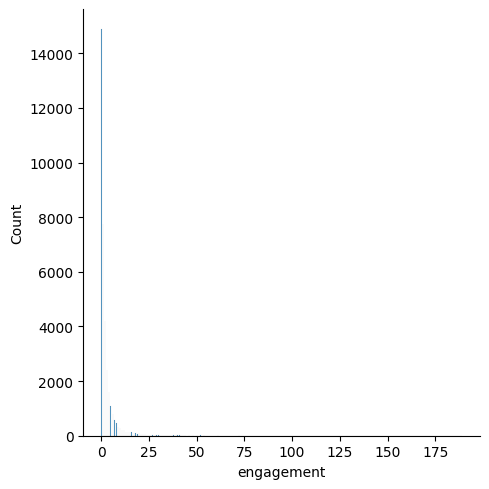

In [159]:
ax = sns.displot(df['engagement'])

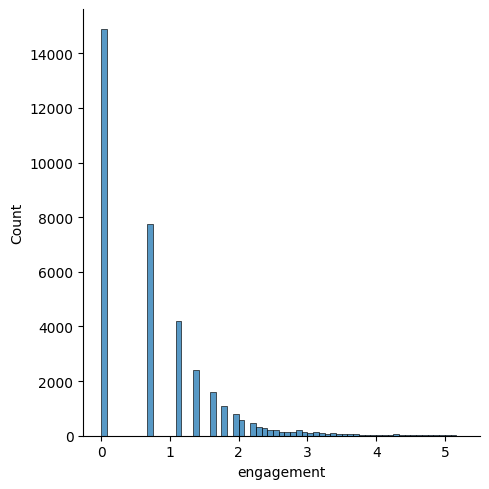

In [160]:
ax = sns.displot(np.log1p(df['engagement']))

In [184]:
df['log_engagement'] = np.log1p(df['engagement'])

In [185]:
df['log_engagement_per_follower'] = np.log1p(df['engagement_per_follower'])

In [186]:
df['log_engagement_per_follower'].describe()

,log_engagement_per_follower
count,36760.000000
mean,0.014072
std,0.057709
min,0.000000
25%,0.000000
50%,0.000327
75%,0.004246
max,0.916291


### Models Testing

In [187]:
# @title Linear regression (x is sentiment code and y is engagement/follower)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df[['sentiment_code']]
y = df['engagement_per_follower']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train, y_train)
print("Feature Coefficients:", model.coef_)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Feature Coefficients: [0.00013719]
MAE: 0.026353270437028547
MSE: 0.006935978132866071
R² Score: -0.0004735287985917491


In [188]:
# @title Linear regression (x is sentiment code and y is log of engagement/per follower)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df[['sentiment_code']]
y = df['log_engagement_per_follower']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

model = LinearRegression()
model.fit(X_train_2, y_train_2)
print("Feature Coefficients:", model.coef_)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_2 = model.predict(X_test_2)
print("MAE:", mean_absolute_error(y_test_2, y_pred_2))
print("MSE:", mean_squared_error(y_test_2, y_pred_2))
print("R² Score:", r2_score(y_test_2, y_pred_2))

Feature Coefficients: [0.00016916]
MAE: 0.022448248769938554
MSE: 0.003924210820958191
R² Score: -0.0004357679818185467


In [190]:
# @title Logistic regression (x is log of engagement/per follower and y is sentiment tone)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Update X and y
X = df[['log_engagement_per_follower']]
y = df['sentiment_tone'] #0 or 1

# Train-test split
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_3, y_train_3)

# Coefficients
print("Feature Coefficients:", model.coef_)

# Predictions
y_pred_3 = model.predict(X_test_3)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_3, y_pred_3))
print("Precision:", precision_score(y_test_3, y_pred_3))
print("Recall:", recall_score(y_test_3, y_pred_3))
print("F1 Score:", f1_score(y_test_3, y_pred_3))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_3, y_pred_3))

Feature Coefficients: [[0.04669334]]
Accuracy: 0.513873775843308
Precision: 0.5416666666666666
Recall: 0.05052748473070516
F1 Score: 0.09243270695784662
Confusion Matrix:
 [[3596  154]
 [3420  182]]


In [191]:
# @title Logistic regression (x is log of engagement/per follower and y is sentiment code)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Update X and y
X = df[['log_engagement_per_follower']]  # Feature(s)
y = df['sentiment_code']  # Multiclass target variable (0, 1, 2)

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

# Multiclass Logistic Regression Model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train_2, y_train_2)

# Coefficients
print("Feature Coefficients:", model.coef_)

# Predictions
y_pred_2 = model.predict(X_test_2)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test_2, y_pred_2))
print("Classification Report:\n", classification_report(y_test_2, y_pred_2))
print("Confusion Matrix:\n", confusion_matrix(y_test_2, y_pred_2))

Feature Coefficients: [[-0.01173892]
 [ 0.06742554]
 [-0.05568662]]
Accuracy: 0.5089771490750816
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.99      0.67      3750
           1       0.33      0.01      0.02      2328
           2       0.00      0.00      0.00      1274

    accuracy                           0.51      7352
   macro avg       0.28      0.33      0.23      7352
weighted avg       0.37      0.51      0.35      7352

Confusion Matrix:
 [[3720   30    0]
 [2306   22    0]
 [1260   14    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

##Multinomial Regression Attempt

####Log Transformation of UserFriends and UserFollowers

In [194]:
df_multinomial = df_final.copy(deep = True)

In [195]:
df_multinomial.head(3)

,UserFollowers,UserFriends,Retweets,Likes,clean_tweet,sentiment_score,sentiment,sentiment_code,sentiment_tone,engagement,engagement_per_follower,engagement_rate
0,312.0,293.0,0.0,0,openai’s gpt4 just got supercharged!,0.917779,positive,1,1,0.0,0.000000,0.000000
1,522.0,684.0,0.0,2,"classical art"" is struggling not changed the ...",0.515711,neutral,0,0,2.0,0.003831,0.383142
2,90392.0,56.0,0.0,0,alibaba invites businesses to trial chatgpt ri...,0.924410,neutral,0,0,0.0,0.000000,0.000000


In [196]:
df_multinomial['log_UserFollowers'] = np.log1p(df_multinomial['UserFollowers'])

In [197]:
df_multinomial['log_engagement'] = np.log1p(df_multinomial['engagement'])

In [200]:
from sklearn.model_selection import train_test_split

# Define input features and target variable
X = df_multinomial[['log_UserFollowers', 'log_engagement']]
y = df_multinomial['sentiment_code']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [205]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict sentiments on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

coefficients = model.coef_  # Shape: (n_classes, n_features)

# Coefficients DataFrame
coef_df = pd.DataFrame(
    coefficients.T,
    columns=["Neutral", "Positive", "Negative"],
    index=X.columns
)
print(coef_df, "\n")

Accuracy: 0.5095212187159956
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      3750
           1       0.32      0.00      0.01      2328
           2       0.00      0.00      0.00      1274

    accuracy                           0.51      7352
   macro avg       0.28      0.33      0.23      7352
weighted avg       0.36      0.51      0.35      7352

Confusion Matrix:
[[3738   12    0]
 [2320    8    0]
 [1269    5    0]]
                    Neutral  Positive  Negative
log_UserFollowers  0.083256 -0.107400  0.024144
log_engagement    -0.021471  0.108031 -0.086560 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: 

##Sentiment Analysis attempt

In [217]:
df_sentiment = df_clean.copy(deep = True)
df_sentiment.head(3)

,UserFollowers,UserFriends,Retweets,Likes,clean_tweet,sentiment_score,sentiment
0,312.0,293.0,0.0,0,openai’s gpt4 just got supercharged!,0.917779,positive
1,522.0,684.0,0.0,2,"classical art"" is struggling not changed the ...",0.515711,neutral
2,90392.0,56.0,0.0,0,alibaba invites businesses to trial chatgpt ri...,0.924410,neutral


In [218]:
mapping = {"negative": 0, "neutral": 1, "positive": 2}
df_sentiment['sentiment_code'] = df_sentiment['sentiment'].map(mapping)

In [219]:
df_sentiment.isna().sum()[df_sentiment.isna().sum()>0]

,0


In [232]:
# @title Word vectorization and Data Splitting
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(df_sentiment['clean_tweet'], df_sentiment['sentiment_code'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = TfidfVectorizer(max_features=500, stop_words='english', lowercase=True)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [233]:
# @title Logistic Regression (unbalanced)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred1 = model1.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")
print(f"F1-Score: {f1_score(y_test, y_pred1, average='weighted')}")
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Accuracy: 0.6716397667163977
F1-Score: 0.6529642264593418
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.28      0.38      1293
           1       0.66      0.84      0.74      3768
           2       0.73      0.61      0.66      2312

    accuracy                           0.67      7373
   macro avg       0.66      0.58      0.59      7373
weighted avg       0.67      0.67      0.65      7373



In [235]:
# @title Logistic Regression (balanced by undersampling)
from imblearn.under_sampling import RandomUnderSampler

# Apply RandomUnderSampler to undersample the majority class
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_tfidf, y_train)

# Train the model on the undersampled data
model2 = LogisticRegression(class_weight='balanced', max_iter=1000)
model2.fit(X_train_resampled, y_train_resampled)
y_pred2 = model2.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")
print(f"F1-Score: {f1_score(y_test, y_pred2, average='weighted')}")
print("Classification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.609385596093856
F1-Score: 0.6171386475060722
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.61      0.48      1293
           1       0.72      0.57      0.64      3768
           2       0.66      0.67      0.66      2312

    accuracy                           0.61      7373
   macro avg       0.59      0.62      0.59      7373
weighted avg       0.64      0.61      0.62      7373



In [238]:
# @title Logistic Regression (balanced by oversampling)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled_2, y_train_resampled_2 = smote.fit_resample(X_train_tfidf, y_train)

model4 = LogisticRegression(class_weight='balanced', max_iter=1000)
model4.fit(X_train_resampled_2, y_train_resampled_2)
y_pred4 = model4.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred4)}")
print(f"F1-Score: {f1_score(y_test, y_pred4, average='weighted')}")
print("Classification Report:")
print(classification_report(y_test, y_pred4))

Accuracy: 0.5814458158144582
F1-Score: 0.5902113906510454
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.61      0.45      1293
           1       0.71      0.52      0.60      3768
           2       0.65      0.67      0.66      2312

    accuracy                           0.58      7373
   macro avg       0.57      0.60      0.57      7373
weighted avg       0.63      0.58      0.59      7373



In [236]:
# @title Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(class_weight='balanced', n_estimators=100)
model3.fit(X_train_tfidf, y_train)

y_pred3 = model3.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred3)}")
print(f"F1-Score: {f1_score(y_test, y_pred3, average='weighted')}")
print("Classification Report:")
print(classification_report(y_test, y_pred3))

Accuracy: 0.6678421266784212
F1-Score: 0.6601573212694627
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.38      0.44      1293
           1       0.68      0.79      0.73      3768
           2       0.72      0.63      0.67      2312

    accuracy                           0.67      7373
   macro avg       0.64      0.60      0.61      7373
weighted avg       0.66      0.67      0.66      7373



In [239]:
# @title Stratified K-Fold Cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Stratified K-Fold Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model1, X_train_tfidf, y_train, cv=skf)

print("Logistic regression, unbalanced")
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

cross_val_scores = cross_val_score(model2, X_train_resampled, y_train_resampled, cv=skf)

print("Logistic regression, balanced by undersampling")
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

cross_val_scores = cross_val_score(model4, X_train_resampled_2, y_train_resampled_2, cv=skf)

print("Logistic regression, balanced by oversampling")
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

cross_val_scores = cross_val_score(model3, X_train_tfidf, y_train, cv=skf)

print("Random forest classifier")
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

Logistic regression, unbalanced
Cross-validation scores: [0.67977623 0.66316325 0.68599525 0.6698881  0.67073584]
Average cross-validation score: 0.6739117348429546
Logistic regression, balanced by undersampling
Cross-validation scores: [0.60493026 0.60914693 0.61239053 0.63087901 0.61810513]
Average cross-validation score: 0.6150903733458671
Logistic regression, balanced by oversampling
Cross-validation scores: [0.61165692 0.61890042 0.62309561 0.62143961 0.62243321]
Average cross-validation score: 0.6195051521988126
Random forest classifier
Cross-validation scores: [0.67299542 0.66333277 0.65751102 0.66378433 0.67429637]
Average cross-validation score: 0.6663839834455334


In [244]:
# @title Choosing best parameters for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Define the hyperparameters grid to search over
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear'],       # Solver to use for smaller datasets
}

# Set up the GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict and evaluate with the best model
y_pred1 = best_model.predict(X_test_tfidf)

# Output the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model
print(f"Accuracy: {accuracy_score(y_test, y_pred1)}")
print(f"F1-Score: {f1_score(y_test, y_pred1, average='weighted')}")
print("Classification Report:")
print(classification_report(y_test, y_pred1))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.6713685067136851
F1-Score: 0.6530592010615839
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.28      0.38      1293
           1       0.66      0.84      0.74      3768
           2       0.72      0.62      0.66      2312

    accuracy                           0.67      7373
   macro avg       0.66      0.58      0.59      7373
weighted avg       0.67      0.67      0.65      7373

